Ensembles and SVM

This lab aims to show the application of `Ensembles` and `Support Vector Machine` techniques. The dataset includes social media users' profiles related to gender, age, and estimated salary attributes besides the target value of purchase decision. We want to discover whether users have purchased a product by clicking on the advertisements shown to them or not.

Please load the file `Social_Network_Ads.csv` which contains 5 columns.
- **UserID**- Each person has a unique ID from which we can identify the person uniquely.
- **Gender**- Person can male or female. This field is very important for our hypothesis.
- **Age**- Age of the person. Because our product can be useful to some ages only.
- **EstimatedSalary**- This column contains salary of a person as salary can affect the shopping of a person.
- **Purchased**- Contains two numbers ‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.This variable is our dependent variable.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Importing packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


In [ ]:
# Importing the dataset
data =

In [ ]:
# Check head

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
# Determining the attributes and target value
y =
X =

(400,) (400, 4)


In [ ]:
# Feature Scaling

# Convert Male, Female
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})



In [ ]:
# Standard Scaling

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## Ensembles

Below, you'll see different experiments with our dataset using`Logistic Regression`, `Decision Trees`, `Random Forest`, `Gradient Boosting Classifier`, `AdaBoost Classifier`, and `Custom Ensemble Model`. Check the performances of all methods by comparing the results.



In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#you can change the parameters and see the results of the model----> {'C': [1, 100], 'penalty': ['l1', 'l2']}

paramsLR = {
'C': [1, 100], 'penalty': ['l1', 'l2']
}

lr = LogisticRegression(random_state=42)
CV_lr = GridSearchCV(estimator=lr, param_grid=paramsLR, cv=5,  n_jobs=5, verbose=1, scoring='accuracy')
CV_lr.fit(X_train, y_train)

print(CV_lr.best_params_)
print(CV_lr.best_score_)

#baseline
lr.fit(X_train, y_train)
print('Accuracy score in baseline Logistics Regression model:\t', accuracy_score(y_test, lr.predict(X_test)))

#bestLogisticsModel
best_lr = LogisticRegression(C=CV_lr.best_params_['C'], penalty=CV_lr.best_params_['penalty'], random_state=42)
best_lr.fit(X_train, y_train)
print('Accuracy score in fine tuning Logistics Regression model:', accuracy_score(y_test, best_lr.predict(X_test)))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 1, 'penalty': 'l2'}
0.840625
Accuracy score in baseline Logistics Regression model:	 0.825
Accuracy score in fine tuning Logistics Regression model: 0.825


In [ ]:
#CART

from sklearn.tree import DecisionTreeClassifier

#you can change the parameters and see the results of the model---->  { 'max_depth' : [3, 5, 10]}

paramsDTC = {
    'max_depth' : [3, 5, 10]
}

dtc = DecisionTreeClassifier(random_state=30)

CV_dtc = GridSearchCV(estimator=dtc, param_grid=paramsDTC, cv = 5, n_jobs=5, verbose=1, scoring='accuracy')
CV_dtc.fit(X_train, y_train)

print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

#baseline
dtc.fit(X_train, y_train)
print('Accuracy score in baseline Decision Tree model:\t', accuracy_score(y_test, dtc.predict(X_test)))

#bestDecisionTreemodel
best_dtc = DecisionTreeClassifier(max_depth=CV_dtc.best_params_['max_depth'], random_state=30)
best_dtc.fit(X_train, y_train)
print('Accuracy score in fine tuning Decision Tree model:', accuracy_score(y_test, best_dtc.predict(X_test)))



Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'max_depth': 3}
0.921875
Accuracy score in baseline Decision Tree model:	 0.85
Accuracy score in fine tuning Decision Tree model: 0.875


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

#you can change the parameters and see the results of the model----> 'RandomForestClassifier': { 'n_estimators': [10, 50], {'min_samples_leaf' :[1, 50]},

paramsRFC = {
    'n_estimators': [10, 50],
    'min_samples_leaf': [1, 50]

}

rfc = RandomForestClassifier(random_state=20)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=paramsRFC, cv = 5, n_jobs=5, verbose=1, scoring='accuracy')
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

#baseline
rfc.fit(X_train, y_train)
print('Accuracy score in baseline Random Forest model:\t', accuracy_score(y_test, rfc.predict(X_test)))

#bestRandomForest
best_rfc = RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators']
                                  , min_samples_leaf=CV_rfc.best_params_['min_samples_leaf']
                                  , random_state=20)
best_rfc.fit(X_train, y_train)
print('Accuracy score in fine tuning Random Forest model:', accuracy_score(y_test, best_rfc.predict(X_test)))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'min_samples_leaf': 1, 'n_estimators': 50}
0.915625
Accuracy score in baseline Random Forest model:	 0.8625
Accuracy score in fine tuning Random Forest model: 0.8625


`AdaBoost` is easy to implement. It iteratively corrects the mistakes of the **weak** classifier and improves accuracy by combining weak learners. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available. However, AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. The most important parameters are `base_estimator`, `n_estimators`, and `learning_rate`. Different base learners can be used as a base-estimator if it accepts sample weight such as Decision Tree, Support Vector Classifier. You can check [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) for more information

In [ ]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

#you can change the parameters and see the results of the model---->'AdaBoostClassifier':  { 'n_estimators': [10, 50] },

paramsADA = {
    'n_estimators': [10, 50]
}

adac = AdaBoostClassifier(random_state=15)

CV_adac = GridSearchCV(estimator=adac, param_grid=paramsADA, cv = 5, n_jobs=5, verbose=1, scoring='accuracy')
CV_adac.fit(X_train, y_train)

print(CV_adac.best_params_)
print(CV_adac.best_score_)

#baseline
adac.fit(X_train, y_train)
print('Accuracy score in baseline AdaBoost Classifier model:\t', accuracy_score(y_test, adac.predict(X_test)))

#bestAdaBoost
best_adac = AdaBoostClassifier(n_estimators=CV_adac.best_params_['n_estimators']
                                , random_state=15)
best_adac.fit(X_train, y_train)
print('Accuracy score in fine tuning AdaBoost Classifier model:', accuracy_score(y_test, best_adac.predict(X_test)))


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'n_estimators': 10}
0.903125
Accuracy score in baseline AdaBoost Classifier model:	 0.85
Accuracy score in fine tuning AdaBoost Classifier model: 0.8625


/opt/homebrew/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebre

`Gradient boosting` is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of **weak** prediction models, typically decision trees. This class of algorithms were described as a stage-wise additive model. This is because one new weak learner is added at a time and existing weak learners in the model are frozen and left unchanged. Check [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for more information.

In [ ]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

#you can change the parameters and see the results of the model----> { 'n_estimators': [10, 50], 'learning_rate': [0.8, 1.0] },

paramsGBC = {
    'n_estimators': [10, 50],
    'learning_rate': [0.8, 1.0]
}

gbc = GradientBoostingClassifier(random_state=10)

CV_gbc = GridSearchCV(estimator=gbc, param_grid=paramsGBC, cv = 5, n_jobs=5, verbose=1, scoring='accuracy')
CV_gbc.fit(X_train, y_train)

print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

#baseline
gbc.fit(X_train, y_train)
print('Accuracy score in baseline GradientBoost Classifier model:\t', accuracy_score(y_test, gbc.predict(X_test)))

#bestAdaBoost
best_gbc = GradientBoostingClassifier(n_estimators=CV_gbc.best_params_['n_estimators']
                                      , learning_rate=CV_gbc.best_params_['learning_rate']
                                      , random_state=10)
best_gbc.fit(X_train, y_train)
print('Accuracy score in fine tuning GradientBoost Classifier model:', accuracy_score(y_test, best_gbc.predict(X_test)))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'learning_rate': 1.0, 'n_estimators': 10}
0.9
Accuracy score in baseline GradientBoost Classifier model:	 0.8875
Accuracy score in fine tuning GradientBoost Classifier model: 0.8875


**`Custom Ensemble Model`** is designed as a combination of three different models. After training the models, test set is run with our own ensemble model.  As a general information; the most common voting rule for *classification* problems is a simple **majority rule**, whereas for *regression*, we can use an **averaging rule**. However, we can easily create our own ensemble models using whatever base models and voting rules we choose. Below we use `EnsembleVoteClassifier` and you can install it by executing `pip install mlxtend`. Check [here](http://rasbt.github.io/mlxtend/installation/) for installation, and [here](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/) for general information about `EnsembleVoteClassifier`.

However there is another tool in sklearn, named as `VotingClassifier`. Check [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) for more information.

In [ ]:
# !pip install mlxtend

In [ ]:
# implementation of EnsembleVoteClassifier

from sklearn import model_selection

#you can change the parameters and see the results of the ensemble model

clf1 = LogisticRegression(random_state=1, C=1, penalty='l2')
clf2 = DecisionTreeClassifier(random_state=1, max_depth = 1)
clf3 = DecisionTreeClassifier(random_state=1, max_depth = 100)

print('5-fold cross validation:\n')

from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='hard')

labels = ['Logistic Regression', 'Decision Tree', 'Decision Tree', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y,
                                              cv=5,
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 0.82 (+/- 0.11) [Logistic Regression]
Accuracy: 0.78 (+/- 0.09) [Decision Tree]
Accuracy: 0.81 (+/- 0.04) [Decision Tree]
Accuracy: 0.83 (+/- 0.10) [Ensemble]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')

params = {'logisticregression__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.877 +/- 0.03 {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.875 +/- 0.03 {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.877 +/- 0.03 {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 20}
0.875 +/- 0.03 {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 200}


In [ ]:
pd.DataFrame(grid.cv_results_).iloc[0]

mean_fit_time                                                                          0.016277
std_fit_time                                                                            0.00408
mean_score_time                                                                        0.001006
std_score_time                                                                         0.000225
param_logisticregression__C                                                                 1.0
param_randomforestclassifier__n_estimators                                                   20
params                                        {'logisticregression__C': 1.0, 'randomforestcl...
split0_test_score                                                                         0.775
split1_test_score                                                                        0.9625
split2_test_score                                                                        0.9125
split3_test_score                       

Here is the `ROC curve` to see the performances of different models

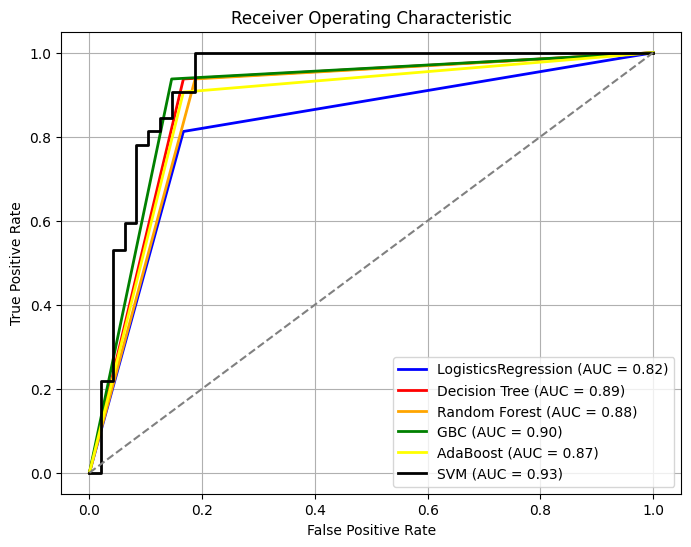

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

#for Logistic Regression
lrPre = best_lr.predict(X_test)
fprLr, tprLr, threshLr = roc_curve(y_test, lrPre)
roc_auc_lr = roc_auc_score(y_test, lrPre)

#for CART
dtcPred = best_dtc.predict(X_test)
fprDtc, tprDtc, threshDtc = roc_curve(y_test, dtcPred)
roc_auc_dtc = roc_auc_score(y_test, dtcPred)

#for Random Forest
rfcPred = best_rfc.predict(X_test)
fprRfc, tprRfc, threshRfc = roc_curve(y_test, rfcPred)
roc_auc_rfc = roc_auc_score(y_test, rfcPred)

#for GBC
gbcPred = best_gbc.predict(X_test)
fprGbc, tprGbc, threshGbc = roc_curve(y_test, gbcPred)
roc_auc_gbc = roc_auc_score(y_test, gbcPred)

#for AdaBoosting
adacPred = best_adac.predict(X_test)
fprAdac, tprAdac, threshAdac = roc_curve(y_test, adacPred)
roc_auc_adac = roc_auc_score(y_test, adacPred)

#for Ensemble
# rfcPred = best_rfc.predict(X_test)
# fprRfc, tprRfc, threshRfc = roc_curve(y_test, rfcPred)
# roc_auc_rfc = roc_auc_score(y_test, rfcPred)

#========================================================
#After "Support Vector Machine" Model Run--COME BACK HERE
#========================================================

svcPred = best_svc.decision_function(X_test)
fprSvc, tprSvc, threshSvc = roc_curve(y_test, svcPred)
roc_auc_svc= roc_auc_score(y_test, svcPred)

#========================================================


# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprLr, tprLr, color='blue', lw=2, label=f'LogisticsRegression (AUC = {roc_auc_lr:.2f})')
plt.plot(fprDtc, tprDtc, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})')
plt.plot(fprRfc, tprRfc, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')
plt.plot(fprGbc, tprGbc, color='green', lw=2, label=f'GBC (AUC = {roc_auc_gbc:.2f})')
plt.plot(fprAdac, tprAdac, color='yellow', lw=2, label=f'AdaBoost (AUC = {roc_auc_adac:.2f})')
plt.plot(fprSvc, tprSvc, color='black', lw=2, label=f'SVM (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Support Vector Machine

The same dataset is used to show the `SVM` performance. The process is the same as training, fitting and the predicting the data. Try Support Vector Classifier model with different hyperparameters. For more information please check [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
# SVC
from sklearn.svm import SVC

#you can change the parameters and see the results of the model----> {'kernel': ['linear', 'rbf', 'poly']}

paramsSVC = {
    'kernel': ['linear', 'rbf', 'poly']
}

svc = SVC(random_state=5)

CV_svc = GridSearchCV(estimator=svc, param_grid=paramsSVC, cv = 5, n_jobs=5, verbose=1, scoring='accuracy')
CV_svc.fit(X_train, y_train)

print(CV_svc.best_params_)
print(CV_svc.best_score_)

#baseline
svc.fit(X_train, y_train)
print('Accuracy score in baseline Support Vector Machine Classifier model:\t', accuracy_score(y_test, svc.predict(X_test)))

#bestAdaBoost
best_svc = SVC(kernel=CV_svc.best_params_['kernel']
                                , random_state=5)
best_svc.fit(X_train, y_train)
print('Accuracy score in fine tuning Support Vector Machine Classifier model:', accuracy_score(y_test, best_svc.predict(X_test)))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'kernel': 'rbf'}
0.9125
Accuracy score in baseline Support Vector Machine Classifier model:	 0.8625
Accuracy score in fine tuning Support Vector Machine Classifier model: 0.8625
